# Assignment 2.5
Student Name: Vo, Huynh Quang Nguyen

CWID: A20446163

### Overview of the dataset

The dataset used in this assignment is extracted from the textbook namely **Applied Statistics and Probability for Engineers (7th Edition)** by Montgomery et al.; the dataset is in Chapter 1, p.13 and p.14. The data in this dataset were collected in an observational study in a semiconductor manufacturing plant. The variables reported in this dataset are **pull strength**, **wire length**, and **die height**. The objective of this study is to predict the pull strength, which is closely related to the bond strength, based on the length of the wire and the height of the die. By investigating the bond strength, engineers can evaluate bond failure modalities or determine compliance with specified bond strength requirements, for instance the MIL-STD-810G standard.

Here is the following R-code to load the dataset.

In [1]:
dat <- read.csv("../datasets/wirepullstrength.csv")
head(dat)

ï..Observation.Number,Pull.Strength,Wire.Length,Die.Height
1,9.95,2,50
2,24.45,8,110
3,31.75,11,120
4,35.00,10,550
5,25.02,8,295
6,16.86,4,200


### Construction of a simple linear model (SLM)

In this assignment, I will investigate only the relationship between the pull strength and the wire length. Hence, a simple linear regression model that describes the relationship between these variables is given as:
$$
\mathbf{y} = \mathbf{\epsilon} + \mathbf{\beta_0} + \mathbf{\beta_1}\mathbf{x} 
$$
with $\mathbf{y}$ is a column vector containing all instances of pull strength; $\mathbf{x}$ is a column vector containing all instances of wire length; $\mathbf{\epsilon}$ is a column vector containing all error terms - which is assummed to be independent and identically distributed whose distribution follows a normal distribution with a mean of zero and an unknown variance $\mathcal{N}(0, \sigma^2)$; $\mathbf{\beta_0}$ and $\mathbf{\beta_1}$ are regression coefficients namely the intercept and the slope, respectively.

The fitted model constructed from the given dataset is as follows:
$$
\mathbf{y} = \mathbf{\beta_0} + \mathbf{\beta_1}\mathbf{x} 
$$
with $\beta_1 = 2.903$ and $\beta_0 = 5.114$. Here is the following R-code to find the model's parameters and visualize the fitted model:


Call:
lm(formula = Pull.Strength ~ Wire.Length, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8889 -1.3199  0.3547  2.0030  5.8314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.114      1.146   4.464 0.000177 ***
Wire.Length    2.903      0.117  24.801  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.093 on 23 degrees of freedom
Multiple R-squared:  0.964,	Adjusted R-squared:  0.9624 
F-statistic: 615.1 on 1 and 23 DF,  p-value: < 2.2e-16


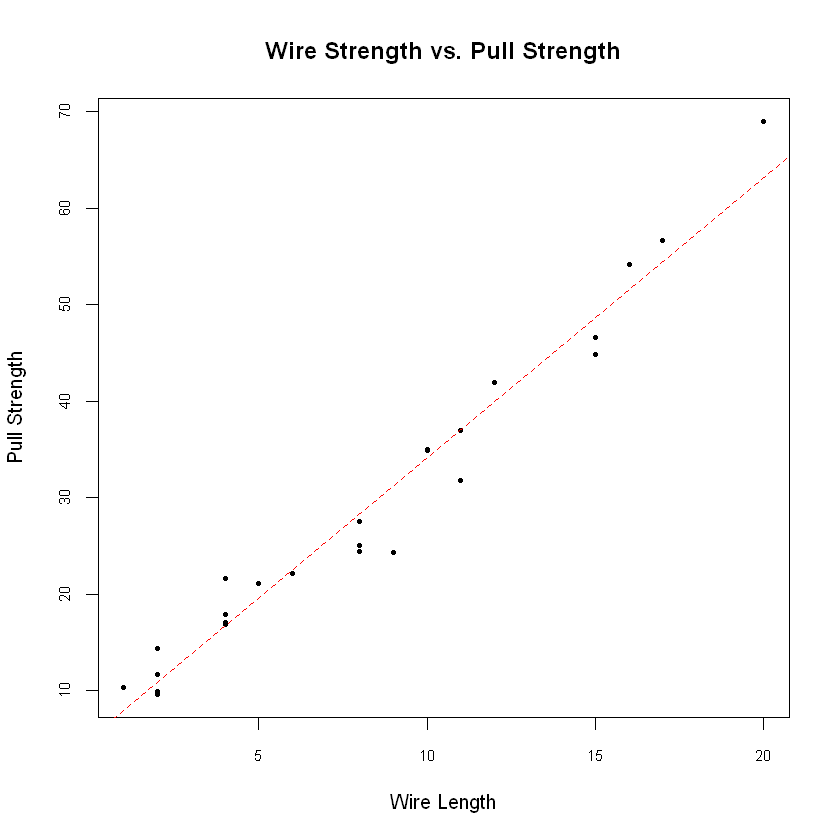

In [3]:
slr_model <- lm(Pull.Strength ~ Wire.Length, data = dat)
summary(slr_model)

plot(dat$Wire.Length, dat$Pull.Strength,
    xlab = "Wire Length", ylab = "Pull Strength", 
    cex.axis = 0.75,
    pch = 16, col = "black", cex = 0.5,
    main = "Wire Strength vs. Pull Strength")
abline(slr_model, col = "red", lty = "dashed")

### Analysis of the model
1. The computed correlation coefficient between these variables is 0.9818118. Meanwhile, the p-value of the hypothesis test for the correlation coefficient ($H_0: \rho = 0$; $H_a: \rho \neq 0$; Significant level: $\alpha = 0.01$) is less than $2\times10^{-16}$. Therefore, we can safely conclude that there is a linear relationship between the pull strength and the wire length.


2. According to the fitted model's summary, the estimated standard deviation of the error terms is $\sigma^2_{\epsilon} = 3.093$. Hence, we can assume that the error terms are i.i.d., and their distribution follows a normal distribution with a mean of zero and an estimated variance of $3.093^2 = 9.566649$. From here, the coefficient of variation yield from this model is:
$$
\text{CV} = 100 \times \frac{s_{\epsilon}}{E(\mathbf{\hat{y}})} \approx 10.6549
$$
with $\mathbf{\hat{y}}$ is a column vector containing all instances of predicted pull strength values using the fitted model.

3. The estimated standard errors of the model's regression coefficients are $\text{se}_{\beta_0} = 1.146$ and $\text{se}_{\beta_1} = 0.117$.

4. Hypothesis test for $\beta_1$: 
    * $H_0: \beta_1 = 0$ meaning the pull strength does not depend on the wire length.
    * $H_a: \beta_1 \neq 0$ meaning the pull strength depends on the wire length.
    * Significant level: $\alpha = 0.01$

Since the p-value is less than $2\times10^{-16}$, which is far lesser than the significant level, we can reject the null hypothesis. Hence, the pull strength depends on the wire length.

5. The 95% confidence interval of the model's slope parameter is $\text{CI}_{\beta_1} = [2.660587, 3.144822]$.

In [8]:
cor.test(dat$Wire.Length, dat$Pull.Strength, conf.level = 0.95)

yhat_mu <- mean(dat$Pull.Strength)
CV <- 100 * (summary(slr_model)$sigma / yhat_mu)
CV

confint(slr_model, 'Wire.Length', level = 0.95)


	Pearson's product-moment correlation

data:  dat$Wire.Length and dat$Pull.Strength
t = 24.801, df = 23, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9585414 0.9920735
sample estimates:
      cor 
0.9818118 


[1] 10.65491

,2.5 %,97.5 %
Wire.Length,2.660587,3.144822
